In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Walmart_sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
import numpy as np
len(np.unique(df["Store"]))

45

In [7]:
df.corr(numeric_only=True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['Day']= df['Date'].dt.day


df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year

In [9]:
df["Year"]

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Year, Length: 6435, dtype: int64

In [10]:
#EDA

In [11]:
walmart_numeric=df.select_dtypes(include="number")

In [12]:
walmart_numeric

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [13]:
walmart_numeric.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,2.910676e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.614332e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.229958e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.358618e-01,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-4.215590e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,4.979672e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.274559e-02,-2.418135e-01
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.519184e-02,6.405867e-03
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,1.000000e+00,-1.944645e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,-1.944645e-01,1.000000e+00


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Weekly Sales')

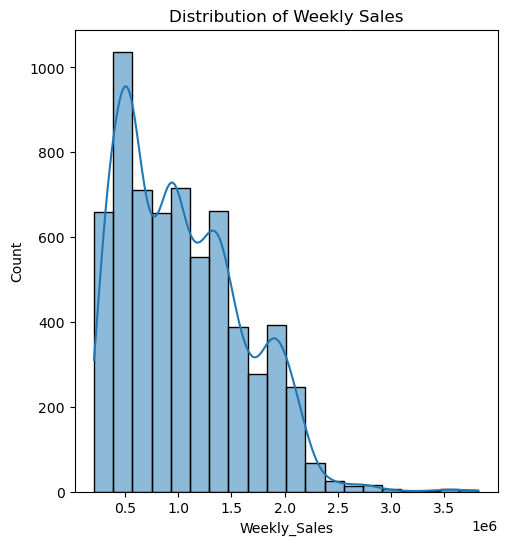

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

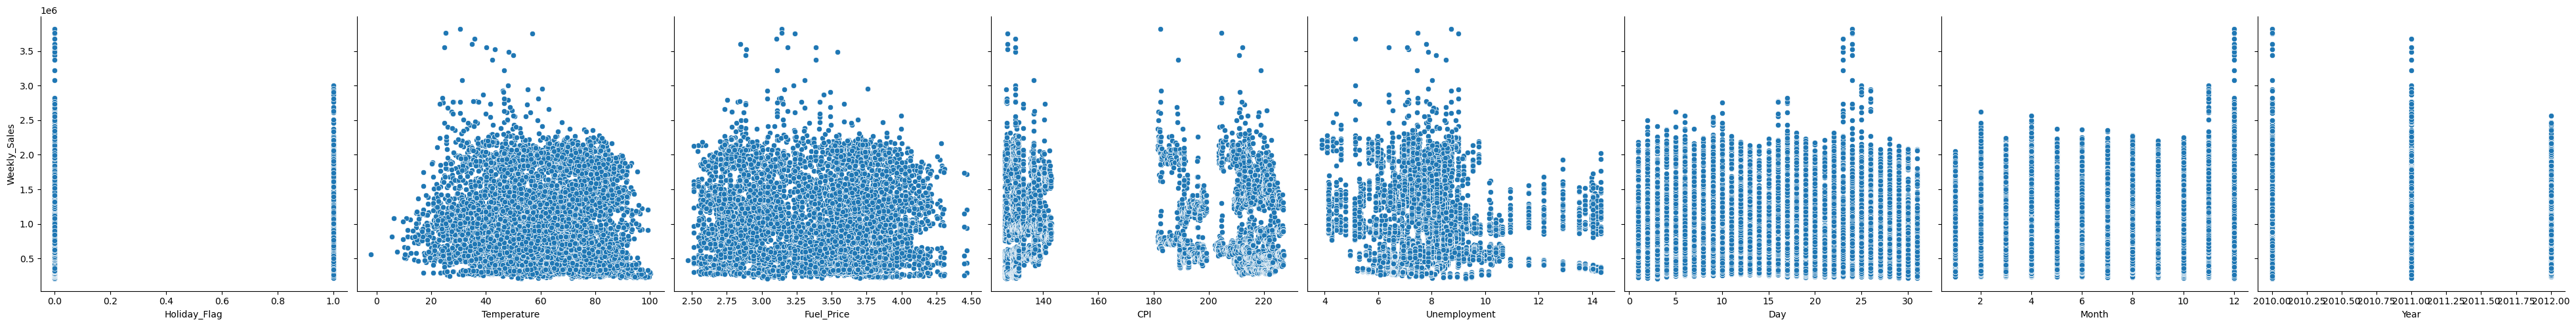

In [16]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=df, x_vars=['Holiday_Flag', 'Temperature', 
                                      'Fuel_Price', 'CPI', 'Unemployment',
                                      'Day', 'Month', 'Year'], 
             y_vars=['Weekly_Sales'], kind='scatter', height=5)
plt.show()

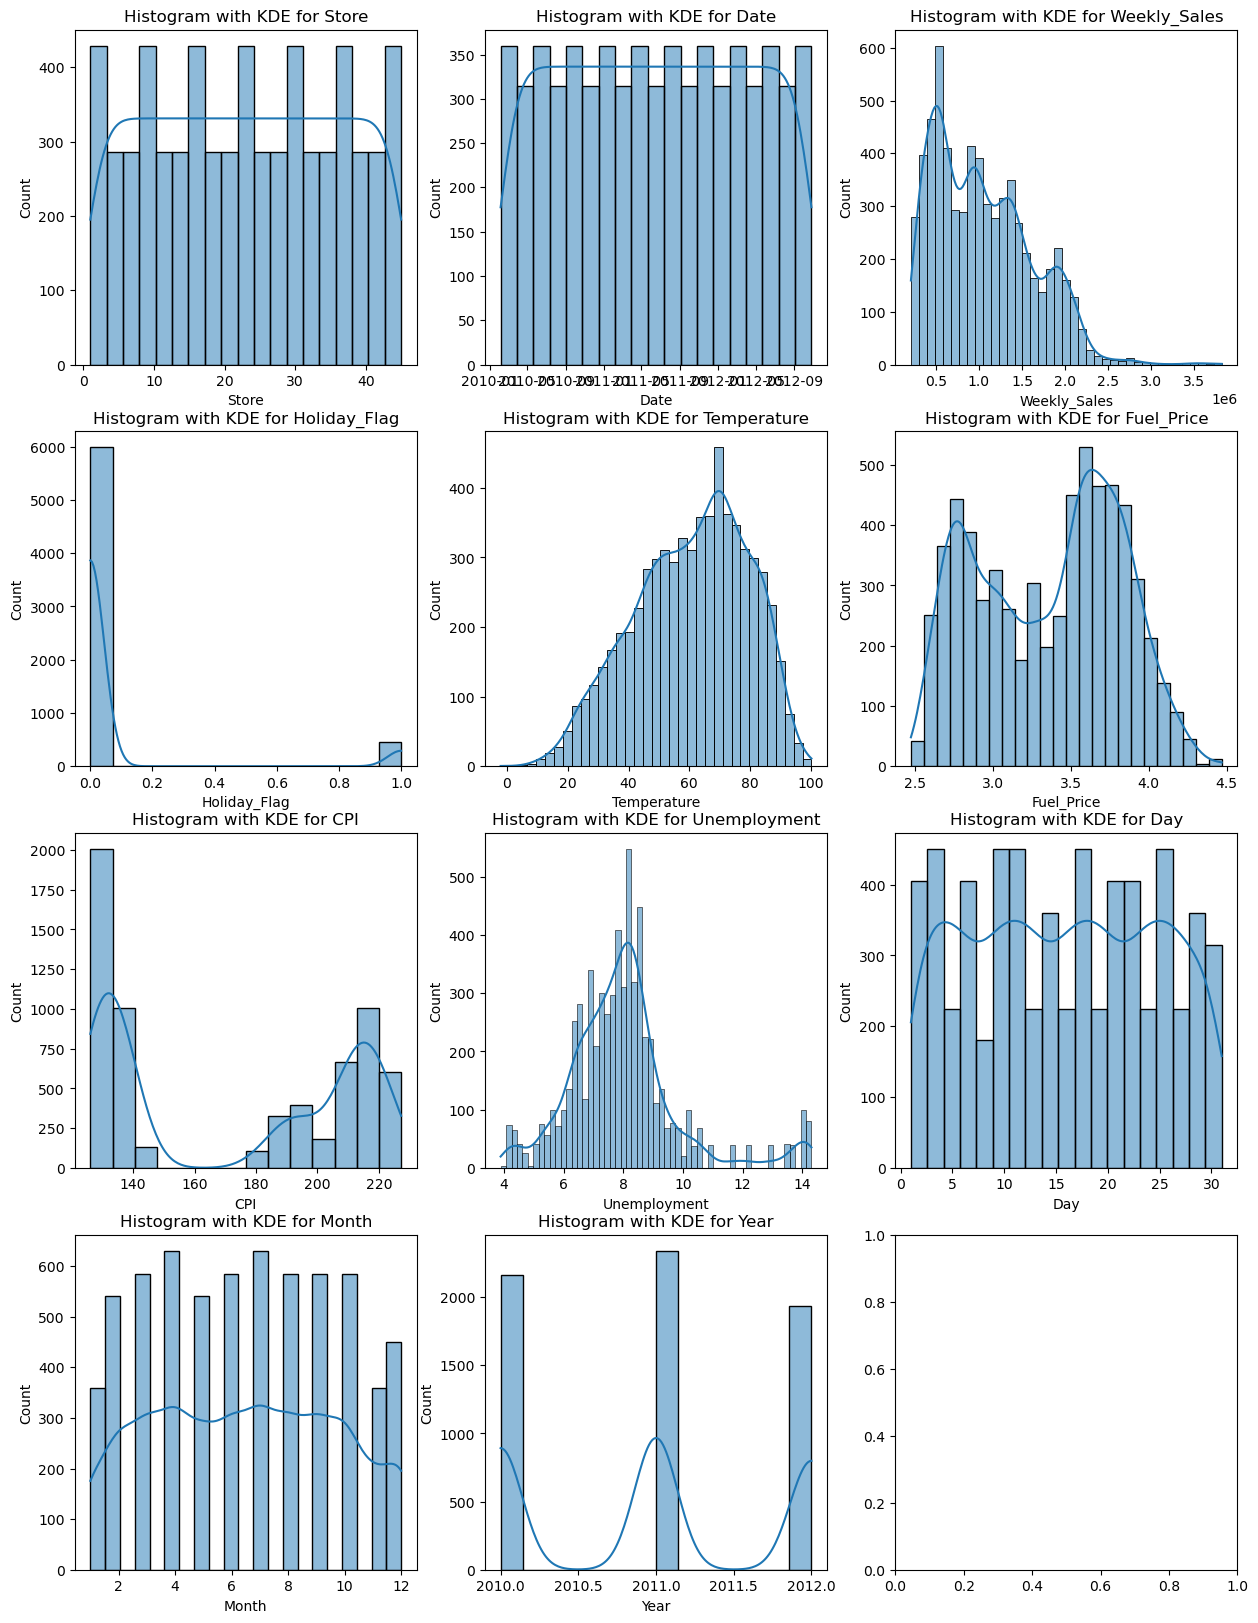

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
num_cols = 3
num_rows = (len(df.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(df.columns):

    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with KDE for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.show()

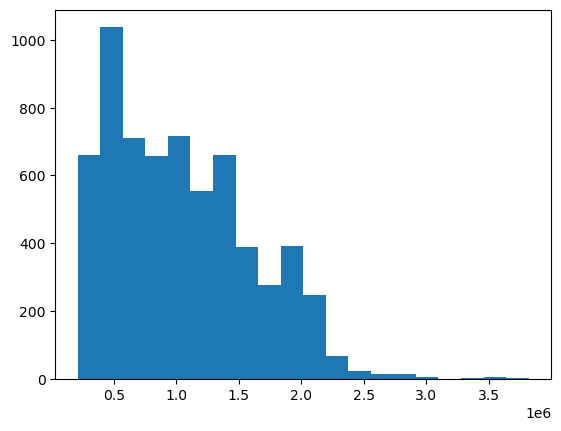

In [20]:
target_column=df["Weekly_Sales"]
plt.hist(target_column,bins=20)
plt.show()

In [21]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                   random_state=101)

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
model=DecisionTreeRegressor(max_depth=10,random_state=42)

In [35]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [36]:
y_pred=model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error

rmse1 =np.sqrt(mean_squared_error(y_test, y_pred))
rmse1

141555.18686758267

In [38]:
target_column = 'WeeklySales'
feature_columns = [col for col in df.columns if col != target_column]


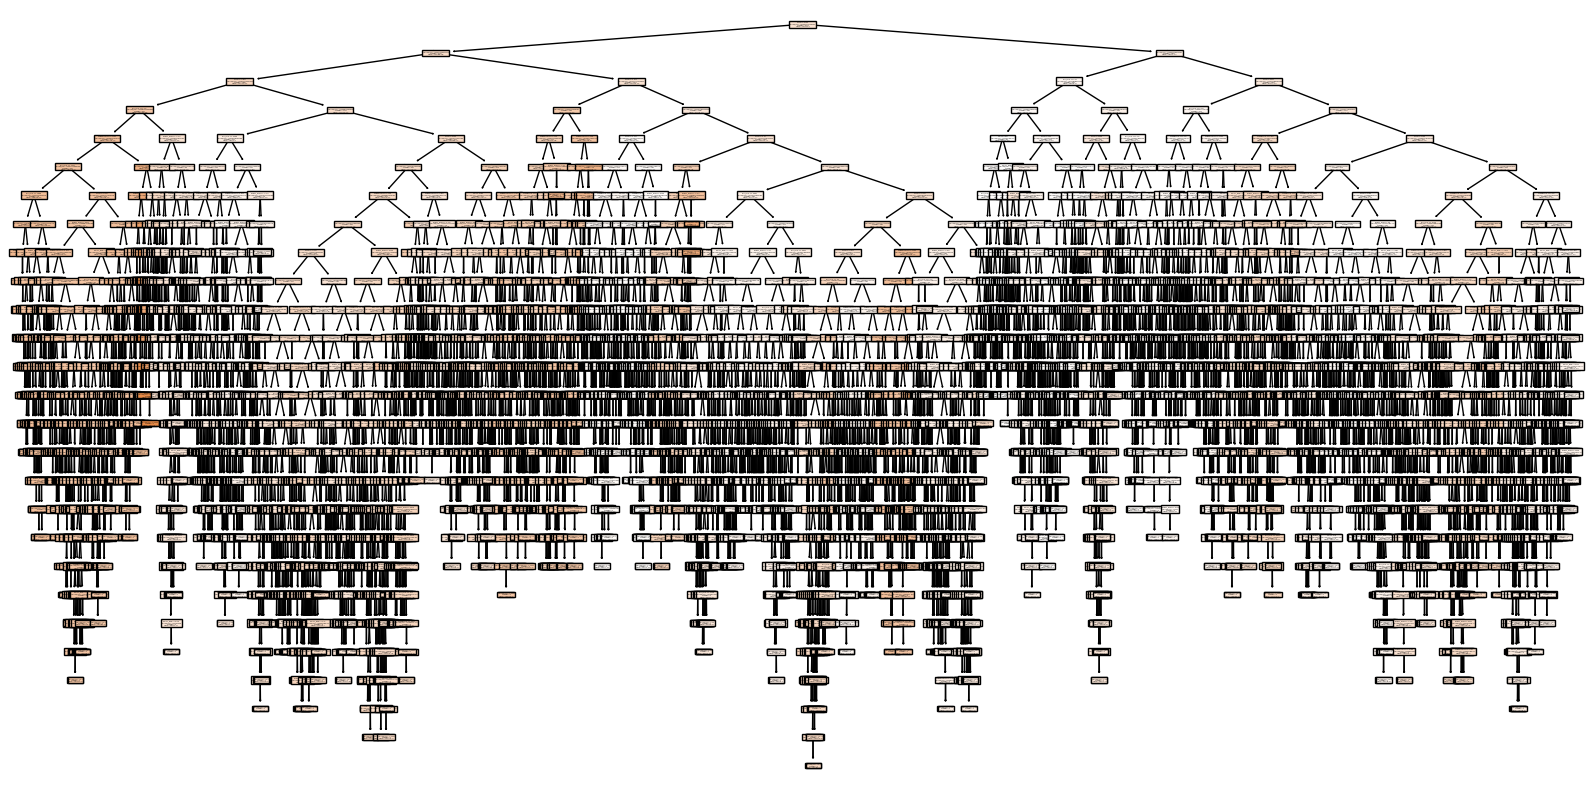

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=feature_columns, filled=True)
plt.show()